In [691]:
import pandas as pd
import numpy as np
import plotly.express as px
import plotly.graph_objects as go
import matplotlib.pyplot as plt
import seaborn as sns
import dash
import datetime as dt
from matplotlib.colors import ListedColormap

from dash import dcc
from dash import html
from itertools import chain
from collections import Counter
from dash.dependencies import Input, Output
from sklearn.pipeline import make_pipeline

import plotly.graph_objects as go
from plotly.subplots import make_subplots

from sklearn.linear_model import LinearRegression
lr = LinearRegression()

from sklearn.preprocessing import PolynomialFeatures

from sklearn.metrics import mean_squared_error


In [692]:
df = pd.read_csv('https://raw.githubusercontent.com/owid/covid-19-data/master/public/data/owid-covid-data.csv')

dfc = pd.read_csv('https://raw.githubusercontent.com/ZelshaR/Project/main/NoteBooks/CSVs/newdfc.csv')
dfc.index = dfc['Unnamed: 0'].values
del dfc['Unnamed: 0']
dfc['nu'] = 0
dfc['nu'] = dfc.index

dfd = pd.read_csv('https://raw.githubusercontent.com/ZelshaR/Project/main/NoteBooks/CSVs/newdfd.csv')
dfd.index = dfd['Unnamed: 0'].values
del dfd['Unnamed: 0']
dfd['nu'] = 0
dfd['nu'] = dfd.index

dfdsr = pd.read_csv('https://raw.githubusercontent.com/ZelshaR/Project/main/NoteBooks/CSVs/newdfdsr.csv')
dfdsr.index = dfdsr['Unnamed: 0'].values
del dfdsr['Unnamed: 0']


dfcsr = pd.read_csv('https://raw.githubusercontent.com/ZelshaR/Project/main/NoteBooks/CSVs/newdfcsr.csv')
dfcsr.index = dfcsr['Unnamed: 0'].values
del dfcsr['Unnamed: 0']

delta = pd.read_csv('https://raw.githubusercontent.com/ZelshaR/Project/main/NoteBooks/CSVs/delta.csv')
delta.index = delta['Unnamed: 0'].values
del delta['Unnamed: 0']

In [693]:
colors = {
    'background': '#D9E6FC',# сам задник графика
    'text': '#ffffff', #цвет всего текста
    'linecolor':'#000000',# рамка графика
    'datcol':'#0080ff', # цвет нижних дат в графике
    'gridcolor':'#FFB6C1', #цвет линий в графике
    'background1': '#8abf95'#небольшое пространство вокруг графиков
}

In [694]:
allcountli = list(dfc.columns)
allcountli.pop(0)
allcount = allcountli
for i in range(len(allcount)):
    allcount[i] = html.Option(value=allcount[i])

the_number_of_cases = dcc.RangeSlider(
    id='value-cases',
    min=1,
    max=len(dfc),
    value=[1, len(dfc)]
)

In [695]:
maru=max(list(dfc['Russia'].values))

<AxesSubplot:>

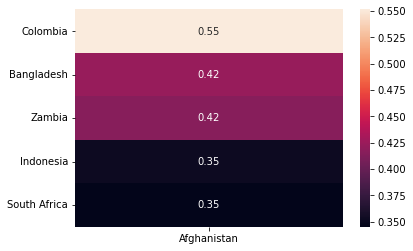

In [696]:
#это кореляция,её вычисление
lisc = list(dfc.columns)
inp='Afghanistan' #Afghanistan
inpcol=lisc.index(inp)
c = dfc.corr()
cd=c.iloc[:,[inpcol]]
cd=cd.sort_values(by=inp,ascending=False)
cd=cd[1:6]
sns.heatmap(cd,annot=True) # vmin=0,vmax=1
# plt.show()

In [697]:
# a = 0
# for i in range(5, 687, 7):
#     a = a + df[df['location'] == 'World']['new_cases'].iloc[i]
casin1=53900404
# print('Заболевших в понедельник:', a)
# a = 0
# for i in range(6, 687, 7):
#     a = a + df[df['location'] == 'World']['new_cases'].iloc[i]
casin2= 61287551
# print('Заболевших во вторник:', a)
# a = 0
# for i in range(0, 687, 7):
#     a = a + df[df['location'] == 'World']['new_cases'].iloc[i]
casin3= 65375155
# print('Заболевших в среду:', a)
# a = 0
# for i in range(1, 687, 7):
#     a = a + df[df['location'] == 'World']['new_cases'].iloc[i]
casin4=62900042
# print('Заболевших в четверг:', a)
# a = 0
# for i in range(2, 687, 7):
#     a = a + df[df['location'] == 'World']['new_cases'].iloc[i]
casin5=63325693
# print('Заболевших в пятницу:', a)
# a = 0
# for i in range(3, 687, 7):
#     a = a + df[df['location'] == 'World']['new_cases'].iloc[i]
casin6=51021337
# print('Заболевших в субботу:', a)
# a = 0
# for i in range(4, 687, 7):
#     a = a + df[df['location'] == 'World']['new_cases'].iloc[i]
casin7=44048155
# print('Заболевших в воскресенье:', a)
# print('Всего заболевших:', df[df['location'] == 'World']['total_cases'].iloc[686])
casinall= 403258184.0
# a = 0
# for i in range(0, 59):
#     a = a + df[df['location'] == 'World']['new_cases'].iloc[i]
casinwin20=277201
# print('Заболевших зимой 2020:', a)
# a = 0
# for i in range(334, 424):
#     a = a + df[df['location'] == 'World']['new_cases'].iloc[i]
casinwin21i=46278237.0
casinwin21d=113578822.0
casinwin22d=170420547.0
# print('Заболевших зимой 2021:', a)
# a = 0
# for i in range(60, 152):
#     a = a + df[df['location'] == 'World']['new_cases'].iloc[i]
casinspr20=8645739.0
# print('Заболевших весной 2020:', a)
# a = 0
# for i in range(425, 514):
#     a = a + df[df['location'] == 'World']['new_cases'].iloc[i]
casinspr21=54969121.0
# print('Заболевших весной 2021:', a)
# a = 0
# for i in range(153, 245):
#     a = a + df[df['location'] == 'World']['new_cases'].iloc[i]
casinsum20=22582840.0
# print('Заболевших летом 2020:', a)
# a = 0
# for i in range(515, 607):
#     a = a + df[df['location'] == 'World']['new_cases'].iloc[i]
casinsum21=50228681.0
# print('Заболевших летом 2021:', a)
# a = 0
# for i in range(246, 333):
#     a = a + df[df['location'] == 'World']['new_cases'].iloc[i]
casinaut20=43715949.0
# print('Заболевших осенью 2020:', a)
# a = 0
# for i in range(607, 686):
#     a = a + df[df['location'] == 'World']['new_cases'].iloc[i]
casinaut21=46807214.0
# print('Заболевших осенью 2021:', a)
# print('Всего заболевших:', df[df['location'] == 'World']['total_cases'].iloc[686])

In [698]:
# corlist = dfc.columns  # 'это нармирование'
# dfcsr = dfc.copy(deep=True)
# dfdsr = dfd.copy(deep=True)
# # for i in corlist:
# #    for j in range(554):
# #       dfcsr[i].iloc[j] = (dfcsr[i].iloc[j]-min(dfcsr[i]))/(max(dfcsr[i])-min(dfcsr[i]))
# # for i in corlist:
# #    for j in range(554):
# #      dfdsr[i].iloc[j] = (dfdsr[i].iloc[j]-min(dfdsr[i]))/(max(dfdsr[i])-min(dfdsr[i]))
# dfcsr = pd.read_csv("https://raw.githubusercontent.com/ZelshaR/Project/main/NoteBooks/CSVs/dfcsr.csv")
# dfdsr = pd.read_csv("https://raw.githubusercontent.com/ZelshaR/Project/main/NoteBooks/CSVs/dfdsr.csv")
# del dfcsr['Unnamed: 0']
# del dfdsr['Unnamed: 0']
print(len(dfc))
dfc.index = np.unique(df['date'])[1:len(dfc)+1]
dfd.index = np.unique(df['date'])[1:len(dfd)+1]

800


In [699]:
# 'это превый грфик'
trace1 = go.Scatter(
        x=dfc.index,
        y=dfcsr['Russia'],
        name='cases',
        yaxis='y2'
    )
trace2 = go.Scatter(
    x=dfd.index,
    y=dfdsr['Russia'],
    name='death',
    yaxis='y2'
    )
fig = make_subplots(specs=[[{"secondary_y": True}]])
fig.add_trace(trace1)
fig.add_trace(trace2, secondary_y=True)
fig['layout'].update(height=600,     
plot_bgcolor = colors['background'],
paper_bgcolor = colors['background'],
font= {
    'color': colors['text']
        }
)
fig.update_yaxes(range=[0, 1])
fig.update_xaxes(showline=True, linewidth=2, linecolor=colors['text'], mirror=True, gridcolor=colors['text'])
fig.update_xaxes(tickfont=dict(color=colors['text'], size=12))
fig.update_yaxes(showline=True, linewidth=2, linecolor=colors['text'], mirror=True, gridcolor=colors['text'])
# fig.show()

In [700]:
# 'это второй грфик'
trace3 = go.Scatter(
    x=dfc.index,
    y=dfcsr['Afghanistan'],
    name='Russia',
    yaxis='y2'
)
trace4 = go.Scatter(
    x=dfc.index,
    y=dfcsr[cd.iloc[0].name],
    name=cd.iloc[0].name,
    yaxis='y2'
)
trace5 = go.Scatter(
    x=dfc.index,
    y=dfcsr[cd.iloc[1].name],
    name=cd.iloc[1].name,
    yaxis='y2'
)
trace6 = go.Scatter(
    x=dfc.index,
    y=dfcsr[cd.iloc[2].name],
    name=cd.iloc[2].name,
    yaxis='y2'
)
trace7 = go.Scatter(
    x=dfc.index,
    y=dfcsr[cd.iloc[3].name],
    name=cd.iloc[3].name,
    yaxis='y2'
)
trace8 = go.Scatter(
    x=dfc.index,
    y=dfcsr[cd.iloc[4].name],
    name=cd.iloc[4].name,
    yaxis='y2'
)
fig3 = make_subplots(specs=[[{"secondary_y": True}]])
fig3.add_trace(trace3)
fig3.add_trace(trace4)
fig3.add_trace(trace5)
fig3.add_trace(trace6)
fig3.add_trace(trace7)
fig3.add_trace(trace8)
fig3['layout'].update(height=600,    
plot_bgcolor = colors['background'],
paper_bgcolor = colors['background'],
font= {
    'color': colors['text']
        }
)
fig3.update_yaxes(range=[0, 1])
fig3.update_xaxes(showline=True, linewidth=2, linecolor=colors['text'], mirror=True, gridcolor=colors['text'])
fig3.update_xaxes(tickfont=dict(color=colors['text'], size=12))
fig3.update_yaxes(showline=True, linewidth=2, linecolor=colors['text'], mirror=True, gridcolor=colors['text'])
# fig3.show()

In [701]:
# это штука делает кореляцию не уродливой
# lisc = list(dfc.columns)
# inp='Afghanistan' #Afghanistan
# inpcol=lisc.index(inp)
# c = dfc.corr()
# cd=c.iloc[:,[inpcol]]
# cd=cd.sort_values(by=inp,ascending=False)
# cd=cd[1:6]
# sns.heatmap(cd,annot=True) # vmin=0,vmax=1
# plt.show()
fig2 = px.imshow(cd)
fig2.update_layout(height=600,width=500,
    plot_bgcolor = colors['background'],
    paper_bgcolor = colors['background1'],
    margin=dict(l=200, r=200, b=100, t=100))
# fig2['layout'].update(height=600,     
# plot_bgcolor = colors['background'],
# paper_bgcolor = colors['background1'],
# )

In [702]:
#дальше смерть
yaxis = dfcsr['Russia'].values
xaxis = [i for i in range(1, len(dfc) + 1)]

xaxis1 = np.reshape(xaxis, (-1, 1))
lr.fit(xaxis1, yaxis)

rmses = []
# enumerate = [i for i in range(9)]
enumerate = [10]

for i in enumerate:
    p = PolynomialFeatures(i, include_bias=True)

    xaxis_poly = p.fit_transform(xaxis1)

    lr.fit(xaxis_poly, yaxis)

    xaxis_ = np.linspace(xaxis1.min(0), xaxis1.max(0), len(dfc)).reshape(len(dfc), 1)
    y_pred_lr = lr.predict(p.transform(xaxis_))
    poly_mse = mean_squared_error(yaxis, y_pred_lr)
    poly_rmse = np.sqrt(poly_mse)
    rmses.append(poly_rmse)
    modelo = make_pipeline(p, lr)
    # сверху не трогать
    # а снизу можно

    # plt.figure(figsize=(10, 5))
    # plt.plot(xaxis_, y_pred_lr, label='Предсказание', c='green')
    # plt.plot(xaxis, yaxis, label='Действительная кривая', c='orange')

In [703]:
yaxis = dfcsr['Russia'].values
xaxis = [i for i in range(1, len(dfc) + 1)]

xaxis1 = np.reshape(xaxis, (-1, 1))
lr.fit(xaxis1, yaxis)

enumerate = [rmses.index(min(rmses))]
p = PolynomialFeatures(i, include_bias=True)

xaxis_poly = p.fit_transform(xaxis1)

lr.fit(xaxis_poly, yaxis)

xaxis_ = np.linspace(xaxis1.min(0), xaxis1.max(0), len(dfc)).reshape(len(dfc), 1)
y_pred_lr = lr.predict(p.transform(xaxis_))
poly_mse = mean_squared_error(yaxis, y_pred_lr)
poly_rmse = np.sqrt(poly_mse)
rmses.append(poly_rmse)

In [704]:
trace1 = go.Scatter(
    x=[i for i in range(1, len(dfc) + 1)],
    y=list(y_pred_lr),
    name='predict',
    yaxis='y2'
)
trace2 = go.Scatter(
    x=xaxis,
    y=list(yaxis),
    name='true',
    yaxis='y2'
)
fig4 = make_subplots(specs=[[{"secondary_y": True}]])
fig4.add_trace(trace1)
fig4.add_trace(trace2, secondary_y=True)
fig4['layout'].update(height=600,     
plot_bgcolor = colors['background'],
paper_bgcolor = colors['background'],
font= {
    'color': colors['text']
        }
)
fig4.update_yaxes(range=[0, 1])
fig4.update_xaxes(showline=True, linewidth=2, linecolor=colors['text'], mirror=True, gridcolor=colors['text'])
fig4.update_xaxes(tickfont=dict(color=colors['text'], size=12))
fig4.update_yaxes(showline=True, linewidth=2, linecolor=colors['text'], mirror=True, gridcolor=colors['text'])


In [705]:
g = np.reshape(dfcsr.index, (-1, 1))
x = 769 # в x день на который предсказываем записать надо
a = 0
for i in range (1,11):
    a = ((x ** (i)) * modelo.steps[1][1].coef_[i]) + a
a = a + modelo.steps[1][1].intercept_
print(a)

0.4939695794497008


In [706]:
def wessr(trdel):
    trdel=trdel[-7:]
     # по delta среднее с весами 
    g=[0.6, 0.2, 0.1, 0.07, 0.01, 0.01, 0.01][::-1] # вообше крутые
    s=0
    sg=0
    for i in range(-1,-8,-1):
        s=s+trdel[i]*g[i]
        sg+=g[i]
    return s
    trdel.append(s)
print(wessr(list(delta['Russia'].values)))

-0.01582930701099344


In [707]:
def wessr3(trdel,con):
    for i in range(3):
        answ=[]
        trdel=trdel[-7:]
         # по delta среднее с весами 
        g=[0.6, 0.2, 0.1, 0.07, 0.01, 0.01, 0.01][::-1] # вообше крутые
        s=0
        sg=0
        for i in range(-1,-8,-1):
            s=s+trdel[i]*g[i]
            sg+=g[i]
        trdel.append(s)
    
    return [i*((max(dfc[con]) - min(dfc[con])) + min(dfc[con])) for i in trdel[-3:]]
print(wessr3(list(delta['Russia'].values),'Russia'))


[-3200.859999999994, -3069.615999999995, -3138.0115999999944]


In [708]:
list(delta['Russia'].values)[-7:]

[-0.0321248596762787,
 -0.0324759780625188,
 -0.0384845532636701,
 -0.0371048063656279,
 -0.0028386190662229,
 -0.0129270910088966,
 -0.015553060911622]

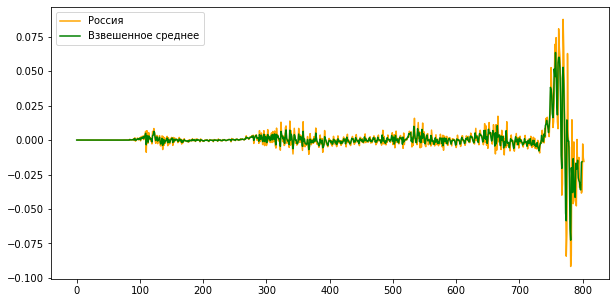

In [709]:
trdel=list(delta['Russia'].values)
trdelpr=[0,0,0,0,0,0,0]
for i in range(7,len(trdel)):
    ex=trdel[:i]
    trdelpr.append(wessr(ex))
plt.figure(figsize=(10,5))
plt.plot(delta.Russia,c='orange' , label="Россия")
plt.plot(trdelpr,c='green' , label="Взвешенное среднее")
plt.legend(loc="upper left")
plt.show()

In [710]:
# 'это  грфик среднего взвешенного'
trdel=list(delta['Russia'].values)
trdelpr=[0,0,0,0,0,0,0]
for i in range(7,len(trdel)):
    ex=trdel[:i]
    trdelpr.append(wessr(ex))
    
trace1 = go.Scatter(
        x=dfc.index,
        y=delta["Russia"],
        name='cases',
        yaxis='y2'
    )
trace2 = go.Scatter(
    x=dfd.index,
    y=trdelpr,
    name='death',
    yaxis='y2'
    )
fig5 = make_subplots(specs=[[{"secondary_y": True}]])
fig5.add_trace(trace1)
fig5.add_trace(trace2, secondary_y=True)
fig5['layout'].update(height=600,     
plot_bgcolor = colors['background'],
paper_bgcolor = colors['background'],
font= {
    'color': colors['text']
        }
)
fig5.update_xaxes(showline=True, linewidth=2, linecolor=colors['text'], mirror=True, gridcolor=colors['text'])
fig5.update_xaxes(tickfont=dict(color=colors['text'], size=12))
fig5.update_yaxes(showline=True, linewidth=2, linecolor=colors['text'], mirror=True, gridcolor=colors['text'])

In [711]:
external_stylesheets = ['https://codepen.io/chriddyp/pen/bWLwgP.css']

app = dash.Dash(__name__, external_stylesheets=external_stylesheets)

server = app.server



#------------------------------------------------------------------------------

app.layout = html.Div(style={'backgroundColor': colors['background1']}, children=[
    html.H1(
        children='График роста и спада заболеваемости',
        style={
            'textAlign': 'center',
            'color': colors['text']
        }
    ),
    
    html.H3(children='Какую страну вы хотите видить на графике.', style={
        'textAlign': 'center',
        'color': colors['text'],
    }),
    
    html.H3(
    dcc.Input(
            id='txtinput',
            type='text',
            pattern=r"^[A-Za-z].*",
            list='browser',
            autoFocus=True,
            value='Russia',
            placeholder="Выберете страну",
        ),
        style={
            'textAlign': 'center',
            'color': colors['text']
        }
    ),

     dcc.Graph(id='num-of-cas',
                  figure=fig),
    
#--------------------------------------------------------------------------------------------------
    html.H3(children='График стран с которыми наиболее коррелирует', style={
    'textAlign': 'center',
    'color': colors['text'],
    }),
    html.Div(
    children=[
    dcc.Graph(id='figure2',
            figure=fig2),
    dcc.Graph(id='figure3',
            figure=fig3),
    ],style={'alignitems': 'center', 'display': 'flex', 'flex-direction': 'row'}
    ),
#     dcc.Graph(id='cor',
#             figure=fig2),
#--------------------------------------------------------------------------------------------------
    html.H3(children='Предсказание', style={
    'textAlign': 'center',
    'color': colors['text'],
    }),
     html.Div(
    children=[
        
    html.Div(
    children=[
    html.H4(children='Регрессия', style={
    'textAlign': 'center',
    'color': colors['text'],
    }),
    dcc.Graph(id='figure4',
            figure=fig4),
     html.H6(id="predict", style={'textAlign': 'center', 'color': colors['text'],}),
    ]),
        
    html.Div(
    children=[
    html.H4(children='Взвешанное среднее', style={
    'textAlign': 'center',
    'color': colors['text'],
    }),
    dcc.Graph(id='figure5',
            figure=fig5),
     html.H6(id="predict2", style={'textAlign': 'center', 'color': colors['text'],}),
    ]),
    ],style={'alignitems': 'center', 'display': 'flex', 'flex-direction': 'row'}
    ),
#--------------------------------------------------------------------------------------------------

    
    
    
    html.Datalist(id='browser', children=allcount),
    
    
])

In [712]:
# if __name__ == '__main__':
#     app.run_server()

In [713]:
@app.callback(
    Output(component_id='num-of-cas', component_property='figure'),
    #     Output(component_id='cor', component_property='figure'),
    Input(component_id='txtinput', component_property='value'),
)
def update_num_of_cas(con):
    trace1 = go.Scatter(
        x=dfc.index,
        y=dfcsr[con],
        name='cases',
        yaxis='y2'
    )
    trace2 = go.Scatter(
        x=dfd.index,
        y=dfdsr[con],
        name='death',
        yaxis='y2'
    )
    fig = make_subplots(specs=[[{"secondary_y": True}]])
    fig.add_trace(trace1)
    fig.add_trace(trace2, secondary_y=True)
    fig['layout'].update(height=600,     
    plot_bgcolor = colors['background'],
    paper_bgcolor = colors['background1'],
    font= {
        'color': colors['text']
            }
    )
    fig.update_yaxes(range=[0, 1])
    fig.update_xaxes(showline=True, linewidth=2, linecolor=colors['linecolor'], mirror=True, gridcolor=colors['gridcolor'])
    fig.update_xaxes(tickfont=dict(color=colors['datcol'], size=12))
    fig.update_yaxes(showline=True, linewidth=2, linecolor=colors['linecolor'], mirror=True, gridcolor=colors['gridcolor'])
    

    return fig

In [714]:
@app.callback(
    Output(component_id='cor', component_property='figure'),
    Input(component_id='txtinput', component_property='value'),
)
def update_heatmap(con):
    lisc = list(dfc.columns)
    inp = con  # Afghanistan
    inpcol = lisc.index(inp)
    dfc1=dfc.copy(deep=True)
    del dfc1['nu']
    c = dfc.corr()
    del c['nu']
    cd = c.iloc[:, [inpcol]]
    cd = cd.sort_values(by=inp, ascending=False)
    cd = cd[1:6]
    sns.heatmap(cd, annot=True)  # vmin=0,vmax=1
    fig2 = px.imshow(cd)
    fig2.update_layout(height=600,width=500,
    plot_bgcolor = colors['background'],
    paper_bgcolor = colors['background1'],
    margin=dict(l=200, r=200, b=100, t=100))
    return fig2

In [715]:
@app.callback(
    Output(component_id='figure3', component_property='figure'),
    Input(component_id='txtinput', component_property='value'),
)
def update_num_of_cas(con):
    lisc = list(dfc.columns)
    inp = con  # Afghanistan
    inpcol = lisc.index(inp)
    dfc1=dfc.copy(deep=True)
    del dfc1['nu']
    c = dfc1.corr()
    cd = c.iloc[:, [inpcol]]
    cd = cd.sort_values(by=inp, ascending=False)
    cd = cd[1:6]

    trace3 = go.Scatter(
        x=dfc.index,
        y=dfcsr[con],
        name=con,
        yaxis='y2'
    )
    trace4 = go.Scatter(
        x=dfc.index,
        y=dfcsr[cd.iloc[0].name],
        name=cd.iloc[0].name,
        yaxis='y2'
    )
    trace5 = go.Scatter(
        x=dfc.index,
        y=dfcsr[cd.iloc[1].name],
        name=cd.iloc[1].name,
        yaxis='y2'
    )
    trace6 = go.Scatter(
        x=dfc.index,
        y=dfcsr[cd.iloc[2].name],
        name=cd.iloc[2].name,
        yaxis='y2'
    )
    trace7 = go.Scatter(
        x=dfc.index,
        y=dfcsr[cd.iloc[3].name],
        name=cd.iloc[3].name,
        yaxis='y2'
    )
    trace8 = go.Scatter(
        x=dfc.index,
        y=dfcsr[cd.iloc[4].name],
        name=cd.iloc[4].name,
        yaxis='y2'
    )
    fig3 = make_subplots(specs=[[{"secondary_y": True}]])
    fig3.add_trace(trace3)
    fig3.add_trace(trace4)
    fig3.add_trace(trace5)
    fig3.add_trace(trace6)
    fig3.add_trace(trace7)
    fig3.add_trace(trace8)
    fig3['layout'].update(height=600,width=1400,     
    plot_bgcolor = colors['background'],
    paper_bgcolor = colors['background1'],
    font= {
        'color': colors['text']
            }
    )
    fig3.update_yaxes(range=[0, 1])
    fig3.update_xaxes(showline=True, linewidth=2, linecolor=colors['linecolor'], mirror=True, gridcolor=colors['gridcolor'])
    fig3.update_xaxes(tickfont=dict(color=colors['datcol'], size=12))
    fig3.update_yaxes(showline=True, linewidth=2, linecolor=colors['linecolor'], mirror=True, gridcolor=colors['gridcolor'])

    return fig3

# colors = {
#     'background': '#D3D3D3',
#     'text': '#696969'
#     'linecolor'='#000000'
#     'datcol'='#0080ff'
#     'gridcolor'='#FFB6C1'
#
# }

In [716]:
@app.callback(
    Output(component_id='figure4', component_property='figure'),
    Input(component_id='txtinput', component_property='value'),
)
def update_predict(con):
    yaxis = dfcsr[con].values
    xaxis = [i for i in range(1, len(dfc) + 1)]

    xaxis1 = np.reshape(xaxis, (-1, 1))
    lr.fit(xaxis1, yaxis)

    rmses = []
    #     enumerate = [i for i in range(11)]
    enumerate = [10]

    for i in enumerate:
        p = PolynomialFeatures(i, include_bias=True)

        xaxis_poly = p.fit_transform(xaxis1)

        lr.fit(xaxis_poly, yaxis)

        xaxis_ = np.linspace(xaxis1.min(0), xaxis1.max(0), len(dfc)).reshape(len(dfc), 1)
        y_pred_lr = lr.predict(p.transform(xaxis_))
        poly_mse = mean_squared_error(yaxis, y_pred_lr)
        poly_rmse = np.sqrt(poly_mse)
        rmses.append(poly_rmse)
        modelo = make_pipeline(p, lr)

    # выше мы определяем лудший вариант
    # ф ниже запихиваем всё в график
    yaxis = dfcsr[con].values
    xaxis = [i for i in range(1, len(dfc) + 1)]

    xaxis1 = np.reshape(xaxis, (-1, 1))
    lr.fit(xaxis1, yaxis)

    enumerate = [rmses.index(min(rmses))]
    p = PolynomialFeatures(i, include_bias=True)

    xaxis_poly = p.fit_transform(xaxis1)

    lr.fit(xaxis_poly, yaxis)

    xaxis_ = np.linspace(xaxis1.min(0), xaxis1.max(0), len(dfc)).reshape(len(dfc), 1)
    y_pred_lr = lr.predict(p.transform(xaxis_))
    poly_mse = mean_squared_error(yaxis, y_pred_lr)
    poly_rmse = np.sqrt(poly_mse)
    rmses.append(poly_rmse)

    trace1 = go.Scatter(
        x=dfc.index,
        y=list(y_pred_lr),
        name='predict',
        yaxis='y2'
    )
    trace2 = go.Scatter(
        x=dfc.index, #ТУТ Я
        y=list(yaxis),
        name='true',
        yaxis='y2'
    )
    fig4 = make_subplots(specs=[[{"secondary_y": True}]])
    fig4.add_trace(trace1)
    fig4.add_trace(trace2, secondary_y=True)
    fig4['layout'].update(height=600,width=900,     
    plot_bgcolor = colors['background'],
    paper_bgcolor = colors['background1'],
    font= {
        'color': colors['text']
            }
    )
    fig4.update_yaxes(range=[0, 1])
    fig4.update_xaxes(showline=True, linewidth=2, linecolor=colors['linecolor'], mirror=True, gridcolor=colors['gridcolor'])
    fig4.update_xaxes(tickfont=dict(color=colors['datcol'], size=12))
    fig4.update_yaxes(showline=True, linewidth=2, linecolor=colors['linecolor'], mirror=True, gridcolor=colors['gridcolor'])
    return fig4

In [717]:
# 'это  грфик среднего взвешенного'
@app.callback(
    Output(component_id='figure5', component_property='figure'),
    Input(component_id='txtinput', component_property='value'),
)
def update_predict(con):
    trdel=list(delta[con].values)
    trdelpr=[0,0,0,0,0,0,0]
    for i in range(7,len(trdel)):
        ex=trdel[:i]
        trdelpr.append(wessr(ex))

    trace1 = go.Scatter(
            x=dfc.index,
            y=delta[con],
            name='True',
            yaxis='y2'
        )
    trace2 = go.Scatter(
        x=dfd.index,
        y=trdelpr,
        name='Взвешенное среднее',
        yaxis='y2'
        )
    fig5 = make_subplots(specs=[[{"secondary_y": True}]])
    fig5.add_trace(trace1)
    fig5.add_trace(trace2, secondary_y=True)
    fig5['layout'].update(height=600,width=900,     
    plot_bgcolor = colors['background'],
    paper_bgcolor = colors['background1'],
    font= {
        'color': colors['text']
            }
    )
    fig5.update_xaxes(showline=True, linewidth=2, linecolor=colors['linecolor'], mirror=True, gridcolor=colors['gridcolor'])
    fig5.update_xaxes(tickfont=dict(color=colors['datcol'], size=12))
    fig5.update_yaxes(showline=True, linewidth=2, linecolor=colors['linecolor'], mirror=True, gridcolor=colors['gridcolor'])
    return fig5

In [718]:
@app.callback(
    Output('predict', "children"),
    Input(component_id='txtinput', component_property='value'),
)
def update_predict(con):
    yaxis = dfcsr[con].values
    xaxis = [i for i in range(1, len(dfc) + 1)]

    xaxis1 = np.reshape(xaxis, (-1, 1))
    lr.fit(xaxis1, yaxis)

    rmses = []
    #     enumerate = [i for i in range(11)]
    enumerate = [10]

    for i in enumerate:
        p = PolynomialFeatures(i, include_bias=True)

        xaxis_poly = p.fit_transform(xaxis1)

        lr.fit(xaxis_poly, yaxis)

        xaxis_ = np.linspace(xaxis1.min(0), xaxis1.max(0), len(dfc)).reshape(len(dfc), 1)
        y_pred_lr = lr.predict(p.transform(xaxis_))
        poly_mse = mean_squared_error(yaxis, y_pred_lr)
        poly_rmse = np.sqrt(poly_mse)
        rmses.append(poly_rmse)
        modelo = make_pipeline(p, lr)

    ans = []
    for j in range(1, 4):
        g = np.reshape(dfcsr.index, (-1, 1))
        x = len(dfc) + j
        a = 0
        for i in range(1, 11):
            a = ((x ** (i)) * modelo.steps[1][1].coef_[i]) + a
        a = a + modelo.steps[1][1].intercept_
        a = a * (max(dfc[con]) - min(dfc[con])) + min(dfc[con])
        ans.append(a)
        
        
        
    dfc.index[-1]
    somev=[int(i) for i in dfc.index[-1].split('-')]
    dtlist=[]
    for i in range(1,4):
        dat = dt.date(somev[0],somev[1],somev[2]+i)
        dt_string = dat.strftime("%B - %d %Y")
        dtlist.append(dt_string)
        
    return "{6}: {0} ± {1}, {7}: {2} ± {3}, {8}: {4} ± {5}".format(round(ans[0]),
                                                                                  round(ans[0] * round(rmses[-1], 2)),
                                                                                  round(ans[1]),
                                                                                  round(ans[1] * round(rmses[-1], 2)),
                                                                                  round(ans[2]),
                                                                                  round(ans[2] * round(rmses[-1], 2)),
                                                                                  dtlist[0],dtlist[1],dtlist[2])
#     return "А вот так"

In [719]:
@app.callback(
    Output('predict2', "children"),
    Input(component_id='txtinput', component_property='value'),
)
def update_predict(con):
    
    dfc.index[-1]
    somev=[int(i) for i in dfc.index[-1].split('-')]
    dtlist=[]
    
    for i in range(1,4):
        dat = dt.date(somev[0],somev[1],somev[2]+i)
        dt_string = dat.strftime("%B - %d %Y")
        dtlist.append(dt_string)
    pr=[round(i)for i in wessr3(list(delta[con].values),con)]

    for i in range(3):
        if i==0:
            pr[i]=dfc[con][-1]+pr[i]
        else:
            pr[i]=pr[i-1]+pr[i]
    return "{3}: {0}, {4}: {1}, {5}: {2}".format(pr[0],pr[1],pr[2],dtlist[0],dtlist[1],dtlist[2])
#     return "а как?"

In [720]:
    dfc.index[-1]
    somev=[int(i) for i in dfc.index[-1].split('-')]
    dtlist=[]
    
    for i in range(1,4):
        dat = dt.date(somev[0],somev[1],somev[2]+i)
        dt_string = dat.strftime("%B - %d %Y")
        dtlist.append(dt_string)
    pr=[round(i)for i in wessr3(list(delta['Russia'].values),'Russia')]

    for i in range(3):
        if i==0:
            pr[i]=dfc['Russia'][-1]+pr[i]
        else:
            pr[i]=pr[i-1]+pr[i]
    print("{3}: {0}, {4}: {1}, {5}: {2}".format(pr[0],pr[1],pr[2],dtlist[0],dtlist[1],dtlist[2]))

March - 12 2022: 40750.0, March - 13 2022: 37680.0, March - 14 2022: 34542.0


In [721]:
if __name__ == '__main__':
    app.run_server()

Dash is running on http://127.0.0.1:8050/

Dash is running on http://127.0.0.1:8050/

Dash is running on http://127.0.0.1:8050/

Dash is running on http://127.0.0.1:8050/

Dash is running on http://127.0.0.1:8050/

Dash is running on http://127.0.0.1:8050/

Dash is running on http://127.0.0.1:8050/

Dash is running on http://127.0.0.1:8050/

Dash is running on http://127.0.0.1:8050/

Dash is running on http://127.0.0.1:8050/

Dash is running on http://127.0.0.1:8050/

Dash is running on http://127.0.0.1:8050/

Dash is running on http://127.0.0.1:8050/

Dash is running on http://127.0.0.1:8050/

Dash is running on http://127.0.0.1:8050/

Dash is running on http://127.0.0.1:8050/

Dash is running on http://127.0.0.1:8050/

Dash is running on http://127.0.0.1:8050/

Dash is running on http://127.0.0.1:8050/

Dash is running on http://127.0.0.1:8050/

Dash is running on http://127.0.0.1:8050/

Dash is running on http://127.0.0.1:8050/

Dash is running on http://127.0.0.1:8050/

Dash is run

 * Running on http://127.0.0.1:8050/ (Press CTRL+C to quit)
127.0.0.1 - - [25/Mar/2022 03:51:55] "GET / HTTP/1.1" 200 -
127.0.0.1 - - [25/Mar/2022 03:51:56] "GET /_dash-layout HTTP/1.1" 200 -
127.0.0.1 - - [25/Mar/2022 03:51:56] "GET /_dash-dependencies HTTP/1.1" 200 -
127.0.0.1 - - [25/Mar/2022 03:51:56] "GET /_dash-component-suites/dash/dcc/async-graph.js HTTP/1.1" 200 -
127.0.0.1 - - [25/Mar/2022 03:51:56] "GET /_dash-component-suites/dash/dcc/async-plotlyjs.js HTTP/1.1" 200 -
127.0.0.1 - - [25/Mar/2022 03:51:56] "POST /_dash-update-component HTTP/1.1" 200 -
127.0.0.1 - - [25/Mar/2022 03:51:56] "POST /_dash-update-component HTTP/1.1" 200 -
127.0.0.1 - - [25/Mar/2022 03:51:56] "POST /_dash-update-component HTTP/1.1" 200 -
127.0.0.1 - - [25/Mar/2022 03:51:56] "POST /_dash-update-component HTTP/1.1" 200 -
127.0.0.1 - - [25/Mar/2022 03:51:56] "POST /_dash-update-component HTTP/1.1" 200 -
127.0.0.1 - - [25/Mar/2022 03:51:56] "POST /_dash-update-component HTTP/1.1" 200 -


In [722]:
# app = dash.Dash(__name__)

# server = app.server

# app.layout = html.Div([
#     html.Div(children=[
#         html.H1(children='График роста и спада заболеваемости', style={
#             'textAlign': 'center',
#         }),

#         html.Div(children='Срок, за который вы хотите видеть рост/спад заболеваемости (в месяцах)', style={
#             'textAlign': 'center'}),
#         html.Div(the_number_of_cases,
#                  style={'width': '400px',
#                         'margine-bottom': '40px'}),
#         html.Div('Какю страну вы хотите увидеть?'),
#         dcc.Input(
#             id='txtinput',
#             type='text',
#             pattern=r"^[A-Za-z].*",
#             list='browser',
#             autoFocus=True,
#             value='Russia'
#         ),
#         dcc.Graph(id='num-of-cas',
#                   figure=fig),
#         html.H1(children='Предсказание', style={
#             'textAlign': 'center',
#         }),
#         dcc.Graph(id='figure4',
#                   figure=fig4),
#     ]),

#     # Первый столб
#     # --------------------------------------------------------------------------------------------------------

#     html.Div(children=[
#         html.H1(children='График стран с которыми наиболее коррелирует', style={
#             'textAlign': 'center',
#         }),

#         dcc.Graph(id='figure3',
#                   figure=fig3),

#         html.H1(children='Статистика', style={'textAlign': 'center', }),
#         html.Div(children='Заболевших в понедельник: {}'.format(casin1), style={'textAlign': 'center', }),
#         html.Div(children='Заболевших в вторник: {}'.format(casin2), style={'textAlign': 'center', }),
#         html.Div(children='Заболевших в среду: {}'.format(casin3), style={'textAlign': 'center', }),
#         html.Div(children='Заболевших в четверг {}:'.format(casin4), style={'textAlign': 'center', }),
#         html.Div(children='Заболевших в пятницу {}:'.format(casin5), style={'textAlign': 'center', }),
#         html.Div(children='Заболевших в субботу {}:'.format(casin6), style={'textAlign': 'center', }),
#         html.Div(children='Заболевших в воскресение: {}'.format(casin7), style={'textAlign': 'center', }),
#         html.Div(children='Заболевших зимой 2020: {}'.format(casinwin20), style={'textAlign': 'center', }),
#         html.Div(children='Заболевших зимой 2021 : {}'.format(casinwin21d + casinwin21i),
#                  style={'textAlign': 'center', }),
#         html.Div(children='Заболевших зимой 2022: {}'.format(casinwin22d), style={'textAlign': 'center', }),
#         html.Div(children='Заболевших весной 2020: {}'.format(casinspr20), style={'textAlign': 'center', }),
#         html.Div(children='Заболевших весной 2021: {}'.format(casinspr21), style={'textAlign': 'center', }),
#         html.Div(children='Заболевших летом 2020: {}'.format(casinsum20), style={'textAlign': 'center', }),
#         html.Div(children='Заболевших летом 2021: {}'.format(casinsum21), style={'textAlign': 'center', }),
#         html.Div(children='Заболевших осенью 2020: {}'.format(casinaut20), style={'textAlign': 'center', }),
#         html.Div(children='Заболевших осенью 2021: {}'.format(casinaut21), style={'textAlign': 'center', }),
#         html.H1(children='Предсказание', style={'textAlign': 'center', }),
#         html.Div(id="predict", style={'textAlign': 'center', }),
#     ]),

#     # второй столб
#     # -----------------------------------------------------------------------------------------
#     html.Div(children=[

#         html.H1(children='Тепловая карта', style={
#             'textAlign': 'center',
#         }),

#         dcc.Graph(id='cor',
#                   figure=fig2)

#     ], style={'padding': 10, 'flex': 0,
#               "left": "50%",

#               'align-items': 'left',
#               }),

#     html.Datalist(id='browser', children=allcount),
#     #     html.Div([
#     #         dcc.Graph(id='num-of-cas1', figure=fig) #возможно
#     #     ]),
# ], style={'alignitems': 'center', 'display': 'flex', 'flex-direction': 'row'})

In [723]:
#возникли просто огромные проблемы с тем чтобы запихать это в график так что пока я решил забить
# а вообше это предсказание по делта при помоши линейной регресии
# rmses = []
# #enumerate = [i for i in range(10)]
# enumerate = [13]

# yaxis = delta['Russia'].values
# xaxis = [i for i in range(1,len(delta) + 1)]

# for i in enumerate:
#     p = PolynomialFeatures(i, include_bias=True)
    
#     xaxis_poly = p.fit_transform(g)

#     lr.fit(xaxis_poly, delta[['Russia']])

#     xaxis_ = np.linspace(g.min(0), g.max(0), len(delta)).reshape(len(delta),1)
#     y_pred_lr = lr.predict(p.transform(xaxis_))
#     poly_mse = mean_squared_error(delta[['Russia']], y_pred_lr)
#     poly_rmse = np.sqrt(poly_mse)
#     rmses.append(poly_rmse)
# #     plt.figure(figsize=(10,5))
# #     plt.plot(xaxis, yaxis, label='Россия', c='orange')
# #     plt.plot(xaxis, y_pred_lr, label='Предсказание', c='green')
# #     plt.legend()
# #     plt.show()
#     modelo = make_pipeline(p, lr)
# fig5 = px.line(x=xaxis, y=list(y_pred_lr), labels={'x':'t', 'y':'cos(t)'})
# fig5.show()
# # trace1 = go.Scatter(
# #     x=xaxis,
# #     y=yaxis,
# #     name='True',
# #     yaxis='y2'
# # )
# # trace2 = go.Scatter(
# #     x=xaxis,
# #     y=list(y_pred_lr),
# #     name='Предсказание',
# #     yaxis='y2'
# # )
# # fig5 = make_subplots(specs=[[{"secondary_y": True}]])
# # fig5.add_trace(trace1)
# # fig5.add_trace(trace2, secondary_y=True)